### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Code starts here
# Load the train data
train = pd.read_csv('train.csv')
train.head(10)

In [3]:
# Shape of the data
print("Shape of the data is:", train.shape)

Shape of the data is: (8582, 11)


In [5]:
#Checking statistical describtion of data
print("Statistical properties of data are as follows")
train.describe()

Statistical properties of data are as follows


,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
count,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000
mean,16.649149,64.493463,14.680727,486.677464,3.697809,1.994640,3.904649,20.482172,3.597448,10.045211,4290.500000
std,8.186261,89.871631,34.867561,802.789725,1.653742,1.792387,1.617678,11.948618,1.624698,6.191468,2477.554338
min,0.000000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,19.990000,1.000000,95.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000,2145.250000
50%,19.000000,36.587800,4.000000,214.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000,4290.500000
75%,23.000000,71.298000,12.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000,6435.750000
max,30.000000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000,8581.000000


In [7]:
#Drop column ID
train.drop('Id',axis=1,inplace=True)
train.head(5)

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10


In [8]:
# Check skewness in the features
print("Skewness for different features is shown as below")
train.skew()

Skewness for different features is shown as below


ages                -0.481067
list_price           4.693097
num_reviews          5.766014
piece_count          3.900989
play_star_rating    -1.538192
review_difficulty    0.491316
star_rating         -1.803453
theme_name           0.126847
val_star_rating     -1.477671
country              0.032907
dtype: float64

In [14]:
# Split into features(X) and target(Y)
X = train.drop("list_price",axis=1)
Y = train['list_price']
# Read feacher X
X.head(2)

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,8,202,2469,4.7,1,4.9,9,4.7,7
1,26,9,252,4.8,0,4.6,39,4.6,20


In [15]:
# Read feacher Y
Y.head(2)

0    155.88
1     19.99
Name: list_price, dtype: float64

In [33]:
# Split into train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y ,test_size=0.3,random_state=6)

In [34]:
#Shape of train test data
print('X_train.shape=',X_train.shape, '\nX_test.shape=', X_test.shape, '\nY_train.shape=',Y_train.shape, '\nY_test.shape=', Y_test.shape)

X_train.shape= (6007, 9) 
X_test.shape= (2575, 9) 
Y_train.shape= (6007,) 
Y_test.shape= (2575,)


In [6]:
# Code ends here.

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

In [40]:
# Code starts here

#Data Visualization

#Checking the best plots for plotting between continuous features and try making some inferences from these plots.

cols = X_train.columns
print("Below columns are present in dataset:")
cols.to_list()

Below columns are present in dataset:


['ages',
 'num_reviews',
 'piece_count',
 'play_star_rating',
 'review_difficulty',
 'star_rating',
 'theme_name',
 'val_star_rating',
 'country']

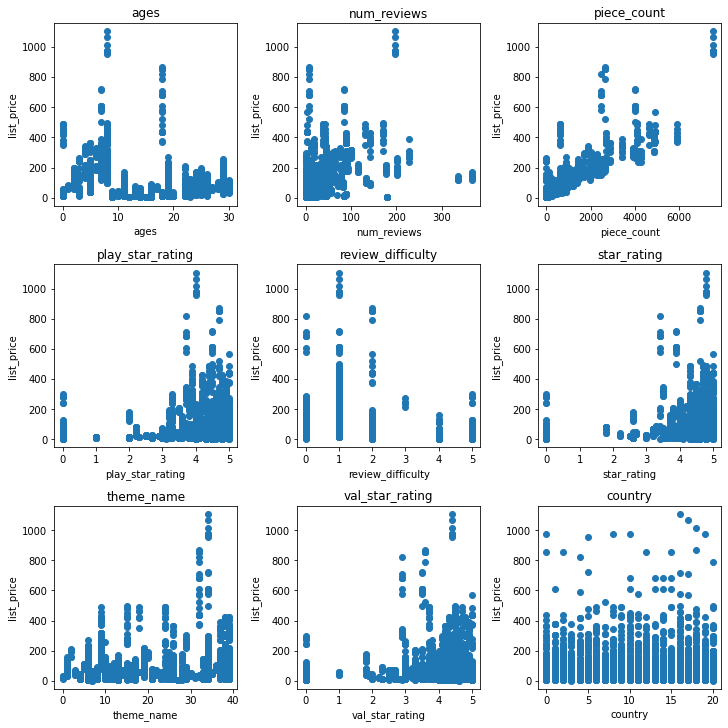

In [47]:

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(10,10), constrained_layout=True)

for i in range(0,3):
    for j in range(0,3):
        col = cols[i*3 + j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col],Y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('list_price')
        
plt.show()

In [36]:
# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

<AxesSubplot:>

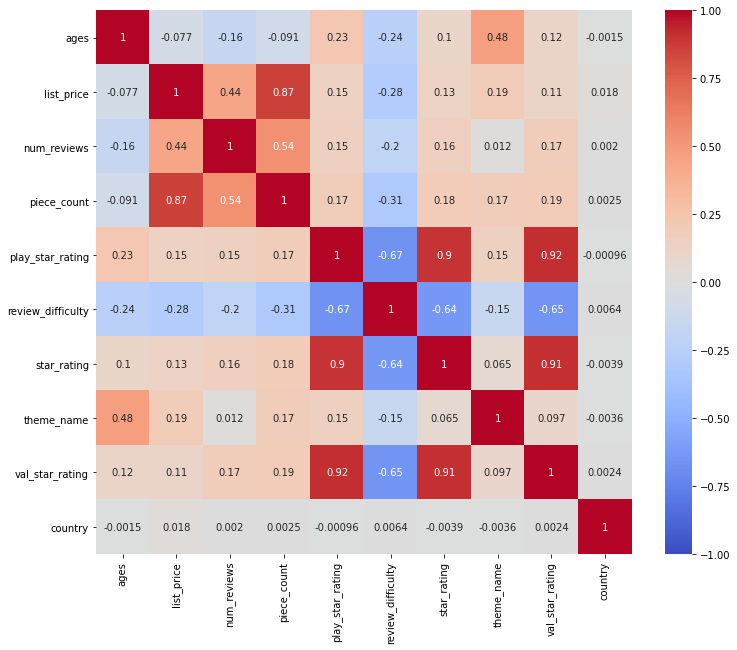

In [58]:
# Code starts here
#Feature Selection

#selecting suitable threshold and dropping columns

# Plotting a heatmap using to check for correlation between the features
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [57]:
# Select upper and lower threshold

upper_threshold = 0.5
lower_threshold = -0.5

# List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')
correlation

review_difficulty  play_star_rating    -0.670508
play_star_rating   review_difficulty   -0.670508
val_star_rating    review_difficulty   -0.650333
review_difficulty  val_star_rating     -0.650333
star_rating        review_difficulty   -0.637901
                                          ...   
piece_count        piece_count          1.000000
num_reviews        num_reviews          1.000000
list_price         list_price           1.000000
val_star_rating    val_star_rating      1.000000
country            country              1.000000
Length: 100, dtype: float64

In [59]:
# Select the highest correlation pairs having correlation greater than upper threshold and lower than lower threshold
corr_pair = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
print(corr_pair)

review_difficulty  play_star_rating    -0.670508
play_star_rating   review_difficulty   -0.670508
val_star_rating    review_difficulty   -0.650333
review_difficulty  val_star_rating     -0.650333
star_rating        review_difficulty   -0.637901
review_difficulty  star_rating         -0.637901
num_reviews        piece_count          0.542924
piece_count        num_reviews          0.542924
list_price         piece_count          0.866119
piece_count        list_price           0.866119
star_rating        play_star_rating     0.902573
play_star_rating   star_rating          0.902573
star_rating        val_star_rating      0.908720
val_star_rating    star_rating          0.908720
play_star_rating   val_star_rating      0.921824
val_star_rating    play_star_rating     0.921824
dtype: float64


In [61]:
# drop columns from X_train
X_train.drop(['play_star_rating','val_star_rating'],axis = 1 ,inplace=True)
X_train.head(10)

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
5994,13,0,85,5,0.0,21,0
2437,11,1,15,2,4.0,13,10
2529,25,4,422,0,4.8,8,20
5865,7,201,1996,1,4.8,34,19
1899,16,18,217,2,2.6,17,3
6877,11,3,28,0,4.3,13,8
1785,19,14,97,2,4.1,34,5
4005,19,9,92,2,4.7,34,10
8430,13,2,67,4,5.0,21,3
6851,29,19,944,0,4.2,38,10


In [62]:
X_test.drop(['play_star_rating','val_star_rating'], axis = 1 ,inplace=True)
X_test.head(10)

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
6272,23,18,254,2,4.2,37,18
1262,19,0,109,5,0.0,8,11
8379,9,0,41,5,0.0,13,8
4989,8,337,1334,1,4.7,9,5
6452,0,1,135,4,4.0,4,19
1353,4,22,2595,0,4.7,39,13
4758,13,3,59,2,5.0,21,4
7357,26,47,409,2,4.1,34,3
8231,14,5,66,2,4.8,7,0
3561,29,8,876,0,5.0,38,3


In [60]:
# Code ends here.

### Model building

In [64]:
# Code starts here

#Model building

#Instantiate linear regression model
regressor = LinearRegression()

# fit the model
regressor.fit(X_train,Y_train)

# predict the result
y_pred = regressor.predict(X_test)
y_pred

array([46.13327416, 26.48886866, 27.47720914, ..., 54.18993735,
       17.43645416, 35.17913195])

In [67]:
# Calculate mse
mse = mean_squared_error(Y_test, y_pred)
print(mse)

# Calculate r2_score
r2 = r2_score(Y_test, y_pred)
print(r2)

2385.6155401803844
0.7327716226983414


In [63]:
# Code ends here.

### Residual check!

- Check the distribution of the residual.

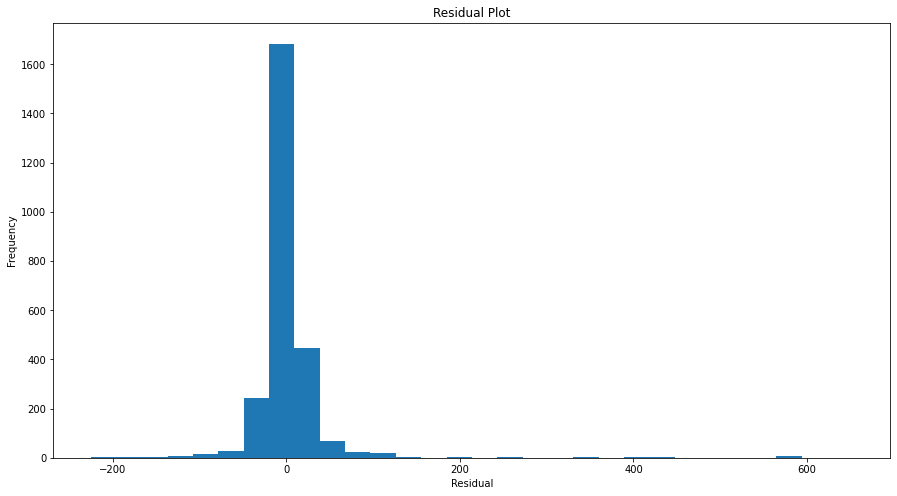

In [68]:
# Code starts here
#Residual check

#checking the distrubution of residuals
residual = (Y_test - y_pred)

# plot the figure for residual
plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Plot")
plt.show()

# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [70]:
# Code starts here

#Prediction on the test data and creating the sample submission file.

#Load the test data and store the Id column in a separate variable.
#Perform the same operations on the test data that you have performed on the train data.


# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')
test.head(5)




# Code ends here.

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [71]:
# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test.drop(['Id','play_star_rating','val_star_rating'],1,inplace=True)
test.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
0,26,8,941,0,4.6,33,16
1,11,0,19,5,0.0,13,7
2,29,34,1376,1,4.3,34,12
3,26,0,369,5,0.0,28,9
4,11,1,19,5,4.0,13,0


In [72]:
# Predict on the test data
y_pred_test = regressor.predict(test)
y_pred_test

array([114.07826338,  24.06263899, 148.658779  , ...,  26.21106837,
        16.39527622,  18.42660112])

In [74]:
# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'list_price':y_pred_test})
sample_submission.head(20)

,Id,list_price
0,9907,114.078263
1,5243,24.062639
2,8276,148.658779
3,6501,55.820522
4,1619,6.998705
5,2226,37.439430
6,7130,205.190413
7,2272,104.628274
8,9594,53.661234
9,38,19.341204


In [75]:
# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission.csv',index=False)